# Classification of countries by text: title and keywords of the articles on suicide. The goal of building the classifier is to learn word embedding vectors. 

## Prepare country labels

In [1]:
#Assign class names
class_names=['Afghanistan','Albania','Algeria','Argentina','Armenia','Australia','Austria','Azerbaijan',
             'Bahamas','Bahrain','Bangladesh','Barbados','Belarus','Belgium','Benin','Bhutan','Bolivia',
             'Bosnia_and_Herzegovina','Brazil','Brunei_Darussalam','Bulgaria','Burkina_Faso','Cambodia',
             'Cameroon','Canada','Central_African_Republic','Chad','Chile','China','Colombia','Congo',
             'Congo_Democratic_Republic','Costa_Rica','Croatia','Cuba','Cyprus','Czechia','Denmark',
             'Dominican_Republic','Ecuador','Egypt','El_Salvador','Eritrea','Estonia','Ethiopia','Fiji',
             'Finland','France','Gambia','Georgia','Germany','Ghana','Greece','Guatemala','Guinea','Guinea-Bissau',
             'Guyana','Haiti','Honduras','Hungary','Iceland','India','Indonesia','Iran','Iraq','Ireland','Israel',
             'Italy','Jamaica','Japan','Jordan','Kazakhstan','Kenya','Kiribati','Kuwait','Kyrgyz_Republic',
             'Latvia','Lebanon','Lesotho','Liberia','Libya','Lithuania','Luxembourg','Madagascar','Malawi',
             'Malaysia','Mali','Malta','Mauritania','Mexico','Micronesia','Moldova','Mongolia','Montenegro',
             'Morocco','Mozambique','Myanmar','Namibia','Nepal','Netherlands','Nicaragua','Niger','Nigeria',
             'North_Korea','Norway','Oman','Pakistan','Panama','Papua_New_Guinea','Paraguay','Peru',
             'Philippines','Poland','Portugal','Qatar','Romania','Russian_Federation','Rwanda','Samoa',
             'Saudi_Arabia','Senegal','Serbia','Seychelles','Sierra_Leone','Singapore','Slovak_Republic',
             'Slovenia','Solomon_Islands','Somalia','South_Africa','South_Korea','Spain','Sri_Lanka',
             'St._Lucia','St_Vincent_Grenadines','Sudan','Suriname','Sweden','Switzerland','Syria',
             'Tajikistan','Tanzania','Thailand','Togo','Tonga','Trinidad_and_Tobago','Turkey','Uganda',
             'Ukraine','United_Arab_Emirates','United_Kingdom','United_States','Uruguay','Uzbekistan',
             'Vanuatu','Venezuela','Vietnam','Yemen','Zimbabwe']


In [3]:
import os, pathlib, shutil, random
import tensorflow as tf
from tensorflow import keras

batch_size = 32
train_ds = keras.utils.text_dataset_from_directory("/home/erin/JUDITA/mdpi_sustainability/kwdsuic/kwd_per_countries/train/", batch_size=batch_size, label_mode="categorical", shuffle=True, labels="inferred", class_names=class_names)

#val_ds = keras.utils.text_dataset_from_directory("kwdsuic/train", batch_size=batch_size, label_mode="categorical")
#test_ds = keras.utils.text_dataset_from_directory("kwdsuic/train", batch_size=batch_size, label_mode="categorical")

Found 18908 files belonging to 159 classes.


#### Inspect the dataset read from directory files 
Displaying the shapes and dtypes of the first batch

In [4]:
for inputs, targets in train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
targets.shape: (32, 159)
targets.dtype: <dtype: 'float32'>
inputs[0]: tf.Tensor(b'acute_psychiatric_treatment aggression coercive_treatment closed_ward compulsory_treatment open_doors psychiatric_hospitals locked_doors compulsory_measures disadvantages advantages restraint wards', shape=(), dtype=string)
targets[0]: tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(159,), dtype=float32)


#### Keep only text in text_only_train_ds. Use only text data. 

In [5]:
# This function returns only data part without target 
# to create a new dataset that will be used to create dictionary
text_only_train_ds = train_ds.map(lambda x, y: x)
for inputs in text_only_train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("inputs[0]:", inputs[0])
    break


inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
inputs[0]: tf.Tensor(b'metropolitan_areas life_lost trends', shape=(), dtype=string)


## Keyword sequences must be transformmed into sequences of indices of the vocabulary words to use embedding
To use embedding we need fixed sequence length. Each country must have country_article_no.txt. For this dataset was transformed. 

##### Later try to classify countries .

In [6]:
import tensorflow as tf
from tensorflow.keras import layers

# max length of keywords sequence
max_length = 50
# max length of the vocabulary
max_tokens = 60000

# create text vectorization layer in which words in training data set are encoded as indices in the vocabulary
text_vectorization = layers.TextVectorization( max_tokens=max_tokens, output_mode="int", 
                                              output_sequence_length=max_length, standardize=None)

# Create vocabulary
text_vectorization.adapt(text_only_train_ds)

# Create data sets - in our case all datasets are the same 
int_train_ds = train_ds.map(lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)
int_val_ds = train_ds.map(lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)
int_test_ds = train_ds.map(lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)

#### This code shows how inputs and targets look like

In [7]:
for inputs, targets in int_train_ds:
    print(inputs.shape)
    print(inputs[0])
    print(targets[0])
    # With this test_input variable verify tf.one_hot() transformation
    test_input=inputs[0]
    break

(32, 50)
tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(50,), dtype=int64)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(159,), dtype=float32)


#### This is to show how to retrieve a vocabulary

In [50]:
vc=text_vectorization.get_vocabulary()
for tg in vc:
    if 'gene' in tg:
        print(tg)

print(len(vc))

general_population
general_practitioners
genetics
general_practice
gene
general_hospital
1st_generation
tph_gene
gene_therapy
suicide_gene_therapy
suicide_gene
genetic_risk_factors
generalized_anxiety_disorder
2nd_generation_immigrants
attitudes_of_general_public
serotonin_transporter_gene
tryptophan_hydroxylase_gene
genetic_epidemiology
general_strain_theory
gene_expression
receptor_gene
pharmacogenetics
pathogenesis
generation
transporter_gene
genetic_polymorphism
general_practitioner
genetic_polymorphisms
general_population_sample
general_hospitals
general_health
salutogenesis
general_health_questionnaire
gene_polymorphisms
gene_polymorphism
gene_environment_interaction
double_suicide_gene
cyp2d6_gene
transgenerational_vulnerability
transgene_expression
thymidine_kinase_gene
populational_genetics
neurogenesis
intergenerational_effects
hippocampal_neurogenesis
heterogeneity
geneva
genetic_variation
general_theory
general_population_surveys
general_population_study
general_internal_me

#### Use Enbedding layer to encode words , to represent each word by a semantic gradient 
The keywords will be treated as sequences

In [11]:
vocab_size = len(vc)
embed_dim = 300
hidden_dim = 100
max_length = 50


# ignore from FC book Ch.11 Listing 11.22
#num_heads = 2
#dense_dim = 32

inputs = keras.Input(shape=(max_length), dtype="int64")

embedded = layers.Embedding(vocab_size, embed_dim, input_length=max_length, name="embedded" )(inputs)

x = layers.Bidirectional(layers.LSTM(200))(embedded)
#x=layers.LSTM(32)(embedded)
#x=layers.Flatten()(embedded)
#x = layers.Dense(hidden_dim, activation="relu")(x)
#x = layers.Dense(2*hidden_dim, activation="relu")(x)

x = layers.Dropout(0.1)(x)
outputs = layers.Dense(159, activation="softmax")(x)

model = keras.Model(inputs, outputs)

# Maybe optimizer could be different? 
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedded (Embedding)        (None, 50, 300)           7148100   
                                                                 
 bidirectional_1 (Bidirecti  (None, 400)               801600    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 159)               63759     
                                                                 
Total params: 8013459 (30.57 MB)
Trainable params: 8013459 (30.57 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [12]:
callbacks = [ keras.callbacks.ModelCheckpoint("int_embedded_lstm_countries_keywords_only.keras", save_best_only=True) ]
model.fit(int_train_ds, validation_data=int_train_ds, epochs=20, verbose=1, callbacks=callbacks)

Epoch 1/20
591/591 [==============================] - 77s 127ms/step - loss: 3.5141 - accuracy: 0.2028 - val_loss: 3.0989 - val_accuracy: 0.2778
Epoch 2/20
591/591 [==============================] - 74s 124ms/step - loss: 2.9731 - accuracy: 0.3062 - val_loss: 2.6295 - val_accuracy: 0.3849
Epoch 3/20
591/591 [==============================] - 73s 124ms/step - loss: 2.6167 - accuracy: 0.3865 - val_loss: 2.3381 - val_accuracy: 0.4519
Epoch 4/20
591/591 [==============================] - 73s 123ms/step - loss: 2.3462 - accuracy: 0.4502 - val_loss: 2.0765 - val_accuracy: 0.5111
Epoch 5/20
591/591 [==============================] - 73s 123ms/step - loss: 2.1233 - accuracy: 0.4980 - val_loss: 1.8806 - val_accuracy: 0.5512
Epoch 6/20
591/591 [==============================] - 72s 122ms/step - loss: 1.9343 - accuracy: 0.5354 - val_loss: 1.7330 - val_accuracy: 0.5877
Epoch 7/20
591/591 [==============================] - 72s 123ms/step - loss: 1.7694 - accuracy: 0.5701 - val_loss: 1.5859 - val_ac

In [14]:
model = keras.models.load_model("int_embedded_lstm_countries_keywords_only.keras")
print(f"Test acc: {model.evaluate(int_train_ds)[1]:.3f}")

591/591 [==============================] - 17s 27ms/step - loss: 1.0866 - accuracy: 0.7005
Test acc: 0.700


#### Save the embedding vectors with vocabulary

In [15]:
import pandas as pd
# extract the embedded layer
l=model.get_layer("embedded").output
print(l)
# extract the weights
# each weight vector corresponds to a word of the vocabulary
w=model.get_layer("embedded").get_weights()

KerasTensor(type_spec=TensorSpec(shape=(None, 50, 300), dtype=tf.float32, name=None), name='embedded/embedding_lookup/Identity:0', description="created by layer 'embedded'")


#### Write files for Embedded Projector 

In [16]:
weights = model.get_layer('embedded').get_weights()[0]
vocab = text_vectorization.get_vocabulary()

In [17]:
import io

# create vocabulary
embedded_vectors={}

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
  embedded_vectors[word]=vec.tolist()

out_v.close()
out_m.close()


In [23]:
#print(embedded_vectors['validation'])

#### Save embedding vectors dictionary

In [20]:
import json
file='embedded_vectors.json'

with open(file, 'w') as f: 
    json.dump(embedded_vectors, f)

# How to read it from json file
#with open(file, 'r') as f:
#    data = json.load(f)

## Following is extra analysis
#### Get the confusion table

#### Recreate the data set without shuffling
This is needed because the dataset batches must not be shuffled in order the targets of samples to correspond to the predicted labels of the same samples.  

In [21]:
import os, pathlib, shutil, random
import tensorflow as tf
from tensorflow import keras

batch_size = 32
train_ds_for_testing = keras.utils.text_dataset_from_directory("../kwdsuic/kwd_per_countries/train", batch_size=batch_size, label_mode="categorical", shuffle=False,
                                                  labels="inferred", class_names=class_names )

#val_ds = keras.utils.text_dataset_from_directory("kwdsuic/train", batch_size=batch_size, label_mode="categorical")
#test_ds = keras.utils.text_dataset_from_directory("kwdsuic/train", batch_size=batch_size, label_mode="categorical")

Found 18908 files belonging to 159 classes.


#### Transform textual data set into 

In [23]:
int_train_ds_for_testing = train_ds_for_testing.map(lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)

In [24]:
import numpy as np
pred=model.predict(int_train_ds_for_testing)
predicted = pred.argmax(axis=-1)

print(np.array(class_names)[predicted])


591/591 [==============================] - 16s 27ms/step
['Afghanistan' 'Afghanistan' 'Japan' ... 'Austria' 'Sri_Lanka' 'Guinea']


In [25]:
import numpy as np
# labels from dataset
actual = np.argmax(np.concatenate([y for x, y in int_train_ds_for_testing], axis=0), axis=1)
print(len(actual) )


18908


In [26]:
inp=np.concatenate([x for x, y in int_train_ds_for_testing])

In [27]:
print(inp)

[[   2   71  342 ...    0    0    0]
 [3285 1898    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [ 106 1503  206 ...    0    0    0]
 [1330 5529    2 ...    0    0    0]
 [ 352 1748 1747 ...    0    0    0]]


In [28]:
kwds=[]
ind=[]
for samp in inp:
    i =[x for x in samp if x>0]
    w =[vc[x] for x in samp if x>0]
    id=' '.join(str(i) )
    ws=' '.join(w)
    kwds.append(ws)
    ind.append(id)
    

In [29]:
import pandas as pd
df=pd.DataFrame({'actual': actual,'predicted':predicted, 
                 'actual_country': np.array(class_names)[actual], 
                 'predicted_country': np.array(class_names)[predicted], 
                 'kwds':kwds, 'ind':ind})

In [30]:
sameclass=np.multiply(actual==predicted,1)
print(sameclass)

[1 1 0 ... 0 0 0]


In [31]:
df['sameclass']=sameclass

In [32]:
print(df.shape[0])

18908


In [33]:
df.head

<bound method NDFrame.head of        actual  predicted actual_country predicted_country  \
0           0          0    Afghanistan       Afghanistan   
1           0          0    Afghanistan       Afghanistan   
2           0         69    Afghanistan             Japan   
3           0         64    Afghanistan              Iraq   
4           0         64    Afghanistan              Iraq   
...       ...        ...            ...               ...   
18903     158        158       Zimbabwe          Zimbabwe   
18904     158         13       Zimbabwe           Belgium   
18905     158          6       Zimbabwe           Austria   
18906     158        132       Zimbabwe         Sri_Lanka   
18907     158         54       Zimbabwe            Guinea   

                                                    kwds  \
0      suicide deliberate_self_harm self_immolation a...   
1                                       critique bombers   
2                                                        

#### Make country summaries for each word in vocabulary

In [34]:
words_by_country={}
actual_country=df['actual_country']
keywords=df['kwds']

for index, kwds in enumerate(keywords):
    country=actual_country[index]
    for kwd in kwds.split(' '):
        if kwd in words_by_country.keys():
            # verify if country exists
            if country in words_by_country[kwd].keys():
                words_by_country[kwd][country]+=1
            else:
                words_by_country[kwd][country]=1
        else:
            words_by_country[kwd]={}
            words_by_country[kwd][country]=1

In [35]:
print(words_by_country)

{'suicide': {'Afghanistan': 106, 'Albania': 5, 'Algeria': 1, 'Argentina': 11, 'Armenia': 1, 'Australia': 520, 'Austria': 55, 'Azerbaijan': 2, 'Bahrain': 2, 'Bangladesh': 23, 'Barbados': 1, 'Belarus': 11, 'Belgium': 67, 'Benin': 4, 'Bolivia': 3, 'Bosnia_and_Herzegovina': 6, 'Brazil': 134, 'Brunei_Darussalam': 1, 'Bulgaria': 7, 'Cambodia': 2, 'Cameroon': 2, 'Canada': 347, 'Chad': 1, 'Chile': 32, 'China': 345, 'Colombia': 24, 'Congo': 1, 'Congo_Democratic_Republic': 1, 'Costa_Rica': 1, 'Croatia': 20, 'Cuba': 10, 'Cyprus': 4, 'Czechia': 11, 'Denmark': 133, 'Dominican_Republic': 1, 'Ecuador': 6, 'Egypt': 5, 'El_Salvador': 4, 'Estonia': 14, 'Ethiopia': 17, 'Fiji': 10, 'Finland': 174, 'France': 126, 'Georgia': 10, 'Germany': 133, 'Ghana': 18, 'Greece': 58, 'Guatemala': 4, 'Guinea': 5, 'Guyana': 7, 'Haiti': 3, 'Honduras': 1, 'Hungary': 43, 'Iceland': 15, 'India': 206, 'Indonesia': 4, 'Iran': 121, 'Iraq': 131, 'Ireland': 577, 'Israel': 73, 'Italy': 128, 'Jamaica': 8, 'Japan': 306, 'Jordan': 2, 

In [36]:
# Make data frame
dfc=pd.DataFrame(words_by_country.values() )
dfc=dfc.fillna(0)

n_countries=[]
word_freq=[]

for i in dfc.index:
    nc=sum(dfc.iloc[i]>0 )
    wf=sum(dfc.iloc[i] )
    n_countries.append(nc)
    word_freq.append(wf)

dfc['n_countries']=n_countries
dfc['word_freq']=word_freq
dfc['words']=words_by_country.keys()

dfc=dfc.sort_values(by='word_freq', ascending=False)
print(dfc)

dfc.to_csv('words_and_countries.csv', index=False)

       Afghanistan  Albania  Algeria  Argentina  Armenia  Australia  Austria  \
0            106.0      5.0      1.0       11.0      1.0      520.0     55.0   
48            68.0      0.0      0.0        5.0      0.0      137.0     16.0   
59            29.0      0.0      0.0        4.0      0.0       94.0     20.0   
22            23.0      3.0      0.0        6.0      0.0      156.0     13.0   
268            9.0      0.0      0.0        1.0      0.0       34.0     13.0   
...            ...      ...      ...        ...      ...        ...      ...   
5324           0.0      0.0      0.0        0.0      0.0        0.0      0.0   
14327          0.0      0.0      0.0        0.0      0.0        0.0      0.0   
14328          0.0      0.0      0.0        0.0      0.0        0.0      0.0   
14329          0.0      0.0      0.0        0.0      0.0        0.0      0.0   
23825          0.0      0.0      0.0        0.0      0.0        0.0      0.0   

       Azerbaijan  Bahrain  Bangladesh 

In [37]:
l=[x for x in n_countries if x<0]
print(l)

[]


#### Try to filter most frequent words from keyword strings

In [38]:
# Group and count actual and predicted
cid=[]
for j in range(df.shape[0]):
    element='_'.join([ str(df['actual'][j]), str(df['predicted'][j]) ] )
    cid.append(element)

df['cid']=cid

In [39]:
df_g=df.copy()
# group the counts

df_groups=df_g.groupby("cid").agg(
    actual=pd.NamedAgg(column="actual", aggfunc="max"),
    actual_country=pd.NamedAgg(column="actual_country", aggfunc=lambda x: str(pd.unique(x)[0]) ),
    predicted=pd.NamedAgg(column="predicted", aggfunc="max"),
    predicted_country=pd.NamedAgg(column="predicted_country", aggfunc=lambda x: str(pd.unique(x)[0]) ),
    counts=pd.NamedAgg(column="cid", aggfunc="count"),
    sameclass=pd.NamedAgg(column="sameclass", aggfunc="max"),
    kwds=pd.NamedAgg(column="kwds",aggfunc=lambda x: ' '.join(x))
).sort_values(by=['counts'], ascending=False)

print(df_groups)
df_groups.to_csv('countries_kwd_groups.csv')

         actual actual_country  predicted predicted_country  counts  \
cid                                                                   
151_151     151  United_States        151     United_States    2614   
65_65        65        Ireland         65           Ireland    1065   
5_5           5      Australia          5         Australia     827   
28_28        28          China         28             China     751   
69_69        69          Japan         69             Japan     679   
...         ...            ...        ...               ...     ...   
143_54      143           Togo         54            Guinea       1   
142_85      142       Thailand         85          Malaysia       1   
142_61      142       Thailand         61             India       1   
50_129       50        Germany        129      South_Africa       1   
9_69          9        Bahrain         69             Japan       1   

         sameclass                                               kwds  
cid 

In [40]:
cnt=df_groups['counts']
values, counts = np.unique(cnt, return_counts=True)
dfcnt=pd.DataFrame({'values':values, 'counts':counts}).sort_values(by=['counts'], ascending=False)
dfcnt

,values,counts
0,1,813
1,2,270
2,3,110
3,4,72
4,5,51
...,...,...
51,82,1
52,85,1
55,128,1
57,140,1


In [41]:
# show confusion table
# Why confusion table shows different accuracy than accuracy of model evaluate? 
# Need to investigate, but leaving it for later now. 
cm=tf.math.confusion_matrix(actual, predicted).numpy()
print(cm)
cmdf=pd.DataFrame(cm, columns=class_names)
cmdf1=cmdf.copy()
cmdf['countries']=class_names
cmdf.set_index('countries')
cmdf.to_csv("countries_conf_mat.csv", index=False)

acc=sum(np.diagonal(cm))/np.sum(cm)
print(acc)

[[137   0   0 ...   1   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  7   0   0 ...  85   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   5]]
0.7004971440660038


In [42]:
# make normalized
cmdf_perc=cmdf1.div(cmdf1.sum(axis=1), axis=0)
#cmdf_perc['countries']=class_names
#cmdf_perc.set_index('countries')
#cmdf_perc.head

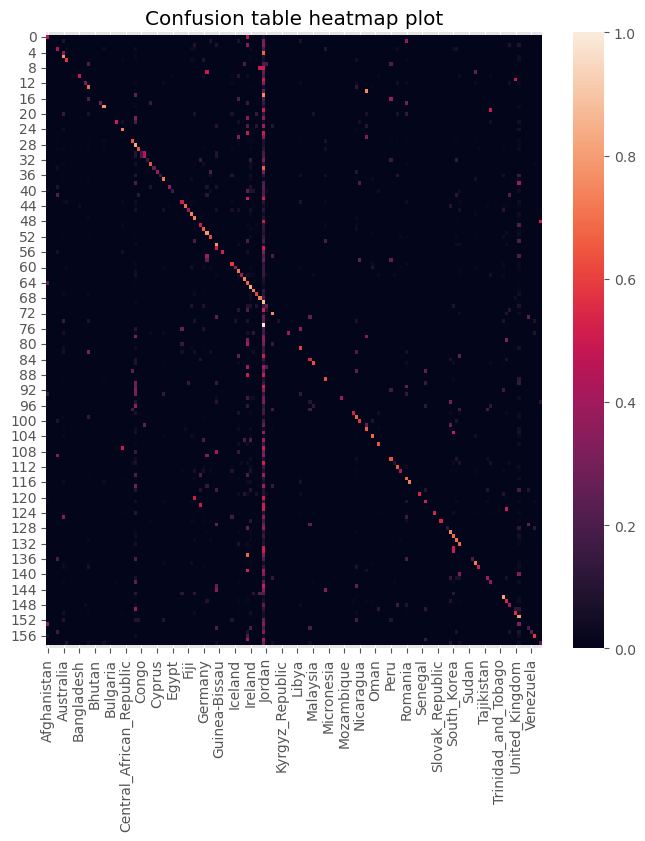

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

np.random.seed(37)

#n = 10
#labels = [f'x{i}' for i in range(n)]
#df = pd.DataFrame(np.random.randint(0, 11, size=(n, n)), index=labels, columns=labels)

fig, ax = plt.subplots(figsize=(8, 8))

_ = sns.heatmap(cmdf_perc)
_ = ax.set_title('Confusion table heatmap plot')

y_min, y_max = ax.get_ylim()
dh = 0.8
_ = ax.set_ylim(y_min + dh, y_max - dh)

In [44]:
cmdf_perc['countries']=class_names
cmdf_perc.set_index('countries')
cmdf_perc.to_csv("countries_conf_mat_perc.csv", index=True)
cmdf_perc.head

<bound method NDFrame.head of      Afghanistan  Albania  Algeria  Argentina  Armenia  Australia   Austria  \
0       0.450658      0.0      0.0   0.000000      0.0   0.000000  0.000000   
1       0.000000      0.0      0.0   0.000000      0.0   0.076923  0.000000   
2       0.000000      0.0      0.0   0.000000      0.0   0.000000  0.000000   
3       0.000000      0.0      0.0   0.419355      0.0   0.000000  0.000000   
4       0.000000      0.0      0.0   0.000000      0.0   0.333333  0.000000   
..           ...      ...      ...        ...      ...        ...       ...   
154     0.000000      0.0      0.0   0.000000      0.0   0.000000  0.000000   
155     0.000000      0.0      0.0   0.153846      0.0   0.000000  0.000000   
156     0.047619      0.0      0.0   0.000000      0.0   0.000000  0.000000   
157     0.000000      0.0      0.0   0.000000      0.0   0.000000  0.000000   
158     0.000000      0.0      0.0   0.000000      0.0   0.000000  0.090909   

     Azerbaijan  Baha

## Explore the embedding layer
The embedding layer dimensions correspond to the words in the vocabulary. The embedding vectors encode words by their semantic context and must have a nice structure where semantically similar words are represented by proximal vectors. Therefore, an expectation is that when we "umap" the embedding vectors, we will see clusters that contain semantically similar words in this specific context.   

In [45]:
import pandas as pd
# how to get the layer
l=model.get_layer("embedded").output
print(l)
w=model.get_layer("embedded").get_weights()
for i in range(23787,23789):
    print(i)
    print(len(w[0][i] ) )
wn=w[0]

print(wn.shape )

#wdf=pd.DataFrame(w)
#vc=text_vectorization.get_vocabulary()
#for tg in vc:
#    print(tg)

print(len(vc))

KerasTensor(type_spec=TensorSpec(shape=(None, 50, 300), dtype=tf.float32, name=None), name='embedded/embedding_lookup/Identity:0', description="created by layer 'embedded'")
23787
300
23788
300
(23827, 300)
23827


#### UMAP 

In [46]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap

reducer=umap.UMAP( n_neighbors=50, repulsion_strength=12)
#repulsion_strength=10
#scaled_data = StandardScaler().fit_transform(wn)

embedding = reducer.fit_transform(wn)

#embedding = reducer.fit_transform(scaled_data)
print(embedding.shape)



(23827, 2)


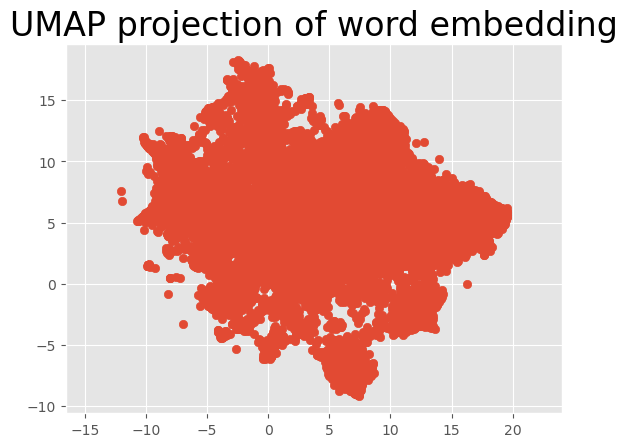

In [47]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
#    c=actual)

#c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of word embedding', fontsize=24);


#### t-SNE

In [50]:
#help(TSNE)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=200, early_exaggeration=300).fit_transform(wn)

#embedding = reducer.fit_transform(scaled_data)
print(tsne.shape)


(23827, 2)


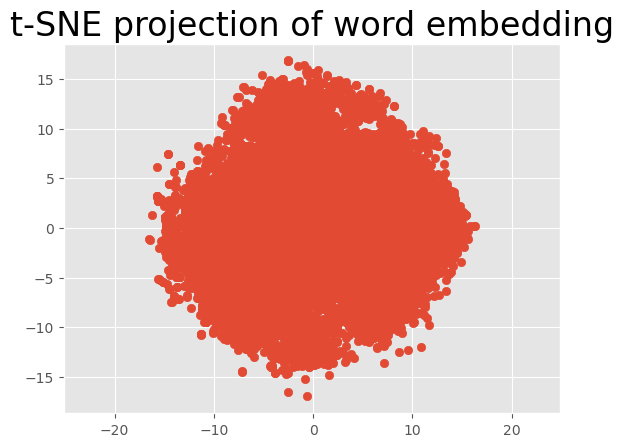

In [49]:
plt.scatter(
    tsne[:, 0],
    tsne[:, 1])
#    c=actual)

#c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]

plt.gca().set_aspect('equal', 'datalim')
plt.title('t-SNE projection of word embedding', fontsize=24);


#### What classes the vocabulary words belong to 

In [94]:
for i in range(1,3):
    a=[i]+[0]*29
    b=tf.constant(a)
    print(b)
    #c=model.predict(b)
    #print(c)

tf.Tensor([1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(30,), dtype=int32)
tf.Tensor([2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(30,), dtype=int32)


In [ ]:
import numpy as np

for inputs, targets in int_train_ds:
    print(inputs.shape)
    print(inputs[0])
    print(targets[0])
    # With this test_input variable verify tf.one_hot() transformation
    break
p=model.predict(inputs)
print(p[0])
print(targets[0])

for i in range(100):
    ind=[x for x in inputs[i].numpy() if x >0]
    words=[vc[i] for i in ind]
    print(ind)
    print(words)
    print(np.argmax(p[i]) , np.argmax(targets[i]) )
#target= np.argmax(targets, axis=1)